# Jupyter Data Science Workflow

### From exploratory analysis to reproducible science

*Jake VanderPlas*

*University of Washington eScience Institute*

In [1]:
URL = "https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD"

In [2]:
from urllib.request import urlretrieve
urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x17c67a1bc88>)

In [3]:
!powershell type Fremont.csv -Head 10

Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
10/03/2012 12:00:00 AM,13,4,9
10/03/2012 01:00:00 AM,10,4,6
10/03/2012 02:00:00 AM,2,1,1
10/03/2012 03:00:00 AM,5,2,3
10/03/2012 04:00:00 AM,7,6,1
10/03/2012 05:00:00 AM,31,21,10
10/03/2012 06:00:00 AM,155,105,50
10/03/2012 07:00:00 AM,352,257,95
10/03/2012 08:00:00 AM,437,291,146


In [4]:
import pandas as pd
data = pd.read_csv('Fremont.csv', index_col = 'Date', parse_dates = True) # added index_col and parse_dates
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


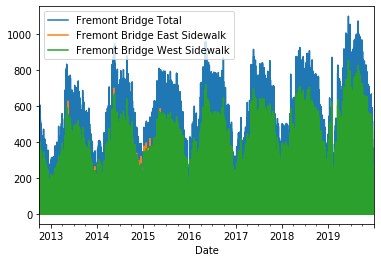

In [5]:
%matplotlib inline
data.plot() # just plot, shows a graph!

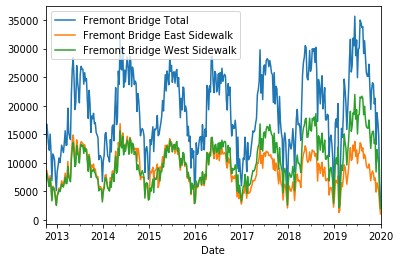

In [6]:
data.resample('W').sum().plot()

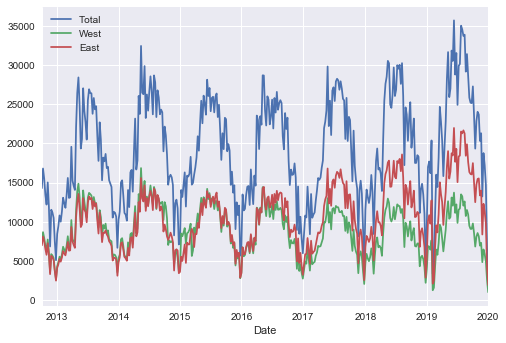

In [7]:
import matplotlib.pyplot as plt # Change the style (seaborn)
plt.style.use('seaborn')
data.columns = ['Total', 'West', 'East'] # Added later, change the legend text
data.resample('W').sum().plot()

(0, 1226006.65)

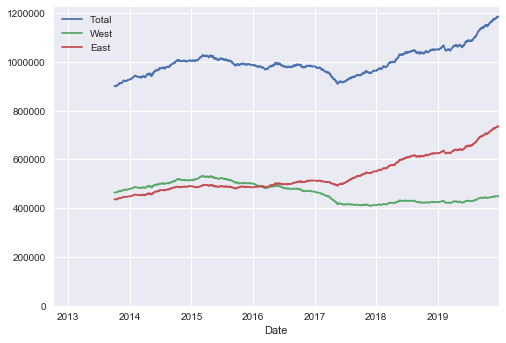

In [8]:
# Creating rolling sum over 365 days:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None) # Added later, set the Y-axis to start from 0

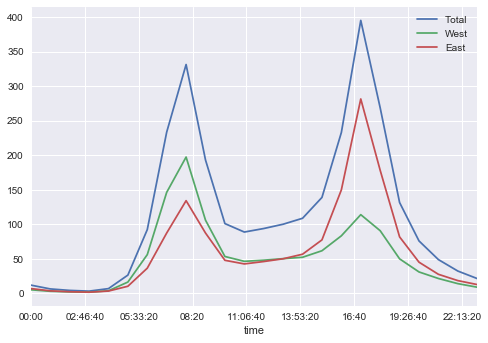

In [9]:
data.groupby(data.index.time).mean().plot()

In [10]:
# See whole dataset in this way, use a pivot table:
pivoted = data.pivot_table('Total', index = data.index.time, columns = data.index.date)
pivoted.iloc[:5, :5]
# pivoted.shape

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


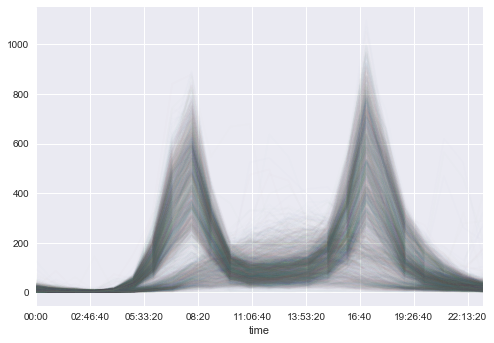

In [11]:
pivoted.plot(legend = False, alpha = 0.01) # Added alpha last, this is the transparency

In [12]:
data.columns

Index(['Total', 'West', 'East'], dtype='object')